In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Data Parsing from Google Trends

In [39]:
# !pip install pytrends

In [40]:
import json
import time
import pytrends
from pytrends.request import TrendReq

In [41]:
# Берем код для каждого топика
topics = ["Birthday", "Private employment agency" , "House moving", "Unemployment benefits", "Recruitment", 
          "Investment", "Lawyer", "Jobs", "Economic crisis", "Unemployment", "Financial crisis", "Public debt", 
          "Office space", "Job search", "Temporary jobs", "Housing bubble", "House price index", "Mortgage", "Crisis", 
          "Loan", "Interest", "Student loan", "Affordable housing", "Recession", "Krach", "Bank", "Bankruptcy", 
          "Exportation", "Commercial Building", "Luggage", "Judicial Liquidation", "Foreclosure"]
topic_list = []
pytrend = TrendReq()

for i in topics:
    topic_list.append(pytrend.suggestions(i)[0]['mid'])

In [44]:
countries = ['AR', 'AU', 'AT', 'BE', 'BG', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CZ', 'DE', 'DK', 'ES', 'EE', 
             'FI', 'FR', 'GB', 'GR', 'HU', 'ID', 'IN', 'IE', 'IS', 'IL', 'IT', 'JP', 'KR', 'LT', 'LU', 'LV', 
             'MX', 'NL', 'NO', 'NZ', 'PL', 'PT', 'RO', 'RU', 'SK', 'SI', 'SE', 'TR', 'US', 'ZA']

# собираем месячные данные
pytrend = TrendReq()
for country in countries:
    dic = []
    for i in range(len(topic_list)):
        pytrend.build_payload(kw_list=[topic_list[i]],
                              timeframe='2008-01-01 2022-01-01', 
                              geo=country)
        df = pytrend.interest_over_time()
        df = df.rename(columns={topic_list[i]:topics[i]})
        dic.append(df)
        
    df = pd.concat(dic, axis=1).reset_index().drop(columns='isPartial')
    df.to_csv('Topics_{}.csv'.format(country), index=False)
    print(country)
    time.sleep(30)

AR
AU
AT
BE
BG
BR
CA
CH
CL
CO
CR
CZ
DE
DK
ES
EE
FI
FR
GB
GR
HU
ID
IN
IE
IS
IL
IT
JP
KR
LT
LU
LV
MX
NL
NO
NZ
PL
PT
RO
RU
SK
SI
SE
TR
US
ZA


In [45]:
cats = ['Events & Listings', 'Business Services', 'Entertainment Industry', 
         'Performing Arts', 'Recruitment & Staffing', 'Internet & Telecom',
         'Autos & Vehicles', 'Office Supplies', 'Programming',
         'Vehicle Brands', 'Bankruptcy', 'Finance',
         'Vehicle Licensing & Registration', 'Credit & Lending',
         'Insurance', 'Health Insurance', 'Commercial Lending', 'Real Estate',
         'Food & Drink', 'College Financing', 'Legal Services',
         'Restaurants', 'Home Financing', 'Architecture', 'Auto Financing',
         'Advertising & Marketing', 'Hospitals & Treatment Centers',
         'Agriculture & Forestry', 'Veterinarians',
         'Emergency Services', 'Forestry', 'Business Services',
         'Mental Health', 'Aquaculture', 'Travel Agencies & Services',
         'Home & Garden', 'Grocery & Food Retailers', 'Fire & Security Services',
         'Real Estate', 'Tobacco Products', 'Government','Real Estate Agencies',
         'Footwear', 'Education', 'Shopping', 'Office Supplies',
         'Medical Facilities & Services', 'Travel', 'Printing & Publishing',
         'Social Services', 'Hotels & Accommodations', 'Fuel Economy & Gas Prices',
         'Performing Arts', 'Computers & Electronics', 'Chemicals Industry', 'Sports',
         'Apparel', 'Pharmacy', 'Professional & Trade Associations', 'Consumer Electronics',
         'Computer Hardware', 'Consumer Electronics', 'Luxury Goods', 'Industrial Materials & Equipment',
         'Unwanted Body & Facial Hair Removal', 'Agricultural Equipment',
         'Boats & Watercraft', 'Alcoholic Beverages', 'Construction & Maintenance',
         'Retail Trade', 'Building Materials & Supplies', 'Pharmaceuticals & Biotech',
         'Freight & Trucking', 'Civil Engineering', 'Transportation & Logistics',
         'Maritime Transport', 'Construction Consulting & Contracting',
         'Distribution & Logistics', 'Aviation', 'Home Improvement', 'Jobs',
         'Import & Export', 'Entertainment Media', 'Developer Jobs', 'Rail Transport',
         'Gifts & Special Event Items', 'Food Production', 'Mail & Package Delivery',
         'Home Appliances', 'Home Furnishings'
        ]

In [46]:
# Файл со словарем, связывающем номер категории и ее название
json_file = open('json.txt')
doc = json_file.read()
dict_data = json.loads(doc)

In [47]:
a = {}
def leaf(tree: dict):
    has_children = len(tree.get('children', [])) > 0
    if has_children:
        for child in tree['children']:
            leaf(child)
    a[tree['name']] = tree['id']
    return a

new_d = leaf(dict_data)

In [48]:
dic = []
cats_list = [new_d[i] for i in cats]

In [49]:
pytrend = TrendReq()
for country in countries:
    for k in range(len(cats_list)):
        pytrend.build_payload(kw_list=[''], 
                              cat=cats_list[k],
                              timeframe='2008-01-01 2022-01-01', 
                              geo=country)
        df = pytrend.interest_over_time()
        df = df.rename(columns={'':cats[k]})
        dic.append(df)
        
    df = pd.concat(dic, axis=1).reset_index().drop(columns='isPartial')
    df.to_csv('GoogleTrends_{}.csv'.format(country), index=False)
    print(country)
    time.sleep(60)

AR
AU
AT
BE
BG
BR
CA
CH
CL
CO
CR
CZ
DE
DK
ES
EE
FI
FR
GB
GR
HU
ID
IN
IE
IS
IL
IT
JP
KR
LT
LU
LV
MX
NL
NO
NZ
PL
PT
RO
RU
SK
SI
SE
TR
US
ZA


In [50]:
# Собираем недельные данные
pytrend = TrendReq()
for country in countries:
    dic = []
    for i in range(len(topic_list)):
        pytrend.build_payload(kw_list=[topic_list[i]], 
                              timeframe='2021-01-01 2022-01-01', 
                              geo=country)
        df = pytrend.interest_over_time()
        df = df.rename(columns={topic_list[i]:topics[i]})
        dic.append(df)
        
    df = pd.concat(dic, axis=1).reset_index().drop(columns='isPartial')
    df.to_csv('WeeklyTopics_{}.csv'.format(country), index=False)
    print(country)
    time.sleep(30)

AR
AU
AT
BE
BG
BR
CA
CH
CL
CO
CR
CZ
DE
DK
ES
EE
FI
FR
GB
GR
HU
ID
IN
IE
IS
IL
IT
JP
KR
LT
LU
LV
MX
NL
NO
NZ
PL
PT
RO
RU
SK
SI
SE
TR
US
ZA


In [51]:
pytrend = TrendReq()
for country in countries:
    for k in range(len(cats_list)):
        pytrend.build_payload(kw_list=[''], 
                              cat=cats_list[k], 
                              timeframe='2021-01-01 2022-01-01', 
                              geo=country)
        df = pytrend.interest_over_time()
        df = df.rename(columns={'':cats[k]})
        dic.append(df)
        
    df = pd.concat(dic, axis=1).reset_index().drop(columns='isPartial')
    df.to_csv('WeeklyGoogleTrends_{}.csv'.format(country), index=False)
    print(country)
    time.sleep(60)

AR
AU
AT
BE
BG
BR
CA
CH
CL
CO
CR
CZ
DE
DK
ES
EE
FI
FR
GB
GR
HU
ID
IN
IE
IS
IL
IT
JP
KR
LT
LU
LV
MX
NL
NO
NZ
PL
PT
RO
RU
SK
SI
SE
TR
US
ZA


# GDP

In [415]:
gdp = pd.read_csv('gdp/world_gdp_46.csv')

gdp = gdp[gdp['SUBJECT'] == 'B1_GE']  # Подсчет по расходам
gdp = gdp[gdp['MEASURE'] == 'GYSA']  # Темпы роста по сравнению с тем же кварталом предыдущего года
gdp = gdp.reset_index(drop=True)

gdp = gdp[['LOCATION', 'TIME', 'Value']]
gdp.head()

,LOCATION,TIME,Value
0,AUS,2008-Q1,3.245563
1,AUS,2008-Q2,2.937365
2,AUS,2008-Q3,2.486237
3,AUS,2008-Q4,1.591064
4,AUS,2009-Q1,1.476778


In [416]:
print('Всего {} кварталов и {} стран.'.format((gdp.shape[0] + 1)/ 46, 46))

Всего 56.0 кварталов и 46 стран.


In [417]:
# Только в России нет данных по 4 кварталу 2021 года
gdp['LOCATION'].value_counts()

AUS    56
AUT    56
SWE    56
CHE    56
TUR    56
GBR    56
USA    56
ARG    56
BRA    56
CHL    56
EST    56
IND    56
IDN    56
ISR    56
SVN    56
ZAF    56
LVA    56
COL    56
LTU    56
BGR    56
ROU    56
ESP    56
SVK    56
PRT    56
POL    56
BEL    56
CAN    56
CZE    56
DNK    56
FIN    56
FRA    56
DEU    56
GRC    56
HUN    56
ISL    56
IRL    56
ITA    56
JPN    56
KOR    56
LUX    56
MEX    56
NLD    56
NZL    56
NOR    56
CRI    56
RUS    55
Name: LOCATION, dtype: int64

In [418]:
countries_tick3 = np.sort(gdp['LOCATION'].unique())
countries_tick3

array(['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA',
       'GBR', 'GRC', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR', 'ITA',
       'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL',
       'POL', 'PRT', 'ROU', 'RUS', 'SVK', 'SVN', 'SWE', 'TUR', 'USA',
       'ZAF'], dtype=object)

In [419]:
ticks_dict = {'ARG': 'AR', 'AUS': 'AU', 'AUT': 'AT', 'BEL': 'BE', 'BGR': 'BG', 
              'BRA': 'BR', 'CAN': 'CA', 'CHE': 'CH', 'CHL': 'CL', 'COL': 'CO', 
              'CRI': 'CR', 'CZE': 'CZ', 'DEU': 'DE', 'DNK': 'DK', 'ESP': 'ES', 
              'EST': 'EE', 'FIN': 'FI', 'FRA': 'FR', 'GBR': 'GB', 'GRC': 'GR', 
              'HUN': 'HU', 'IDN': 'ID', 'IND': 'IN', 'IRL': 'IE', 'ISL': 'IS', 
              'ISR': 'IL', 'ITA': 'IT', 'JPN': 'JP', 'KOR': 'KR', 'LTU': 'LT', 
              'LUX': 'LU', 'LVA': 'LV', 'MEX': 'MX', 'NLD': 'NL', 'NOR': 'NO',
              'NZL': 'NZ', 'POL': 'PL', 'PRT': 'PT', 'ROU': 'RO', 'RUS': 'RU', 
              'SVK': 'SK', 'SVN': 'SI', 'SWE': 'SE', 'TUR': 'TR', 'USA': 'US', 
              'ZAF': 'ZA'}

In [420]:
inv_ticks_dict = {v: k for k, v in ticks_dict.items()}
inv_ticks_dict

{'AR': 'ARG',
 'AU': 'AUS',
 'AT': 'AUT',
 'BE': 'BEL',
 'BG': 'BGR',
 'BR': 'BRA',
 'CA': 'CAN',
 'CH': 'CHE',
 'CL': 'CHL',
 'CO': 'COL',
 'CR': 'CRI',
 'CZ': 'CZE',
 'DE': 'DEU',
 'DK': 'DNK',
 'ES': 'ESP',
 'EE': 'EST',
 'FI': 'FIN',
 'FR': 'FRA',
 'GB': 'GBR',
 'GR': 'GRC',
 'HU': 'HUN',
 'ID': 'IDN',
 'IN': 'IND',
 'IE': 'IRL',
 'IS': 'ISL',
 'IL': 'ISR',
 'IT': 'ITA',
 'JP': 'JPN',
 'KR': 'KOR',
 'LT': 'LTU',
 'LU': 'LUX',
 'LV': 'LVA',
 'MX': 'MEX',
 'NL': 'NLD',
 'NO': 'NOR',
 'NZ': 'NZL',
 'PL': 'POL',
 'PT': 'PRT',
 'RO': 'ROU',
 'RU': 'RUS',
 'SK': 'SVK',
 'SI': 'SVN',
 'SE': 'SWE',
 'TR': 'TUR',
 'US': 'USA',
 'ZA': 'ZAF'}

In [421]:
countries_tick2 = []
for c in countries_tick3:
    countries_tick2.append(ticks_dict[c])
countries_tick2 = np.array(countries_tick2)
countries_tick2

array(['AR', 'AU', 'AT', 'BE', 'BG', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR',
       'CZ', 'DE', 'DK', 'ES', 'EE', 'FI', 'FR', 'GB', 'GR', 'HU', 'ID',
       'IN', 'IE', 'IS', 'IL', 'IT', 'JP', 'KR', 'LT', 'LU', 'LV', 'MX',
       'NL', 'NO', 'NZ', 'PL', 'PT', 'RO', 'RU', 'SK', 'SI', 'SE', 'TR',
       'US', 'ZA'], dtype='<U2')

In [422]:
(countries_tick2 == np.sort(countries_tick2)).all()

False

In [423]:
gdp

,LOCATION,TIME,Value
0,AUS,2008-Q1,3.245563
1,AUS,2008-Q2,2.937365
2,AUS,2008-Q3,2.486237
3,AUS,2008-Q4,1.591064
4,AUS,2009-Q1,1.476778
...,...,...,...
2570,CRI,2020-Q4,-3.423730
2571,CRI,2021-Q1,-0.164337
2572,CRI,2021-Q2,10.262882
2573,CRI,2021-Q3,12.613781


In [425]:
# Сохраняем
gdp.to_csv('data_processed/gdp_processed.csv', index=False)

# Google Trends Quarterly Timeseries
### Unique features for each country
Ищем пересечение признаков по всем странам в недельных и месячных данных

In [676]:
countries_tick2

array(['AR', 'AU', 'AT', 'BE', 'BG', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR',
       'CZ', 'DE', 'DK', 'ES', 'EE', 'FI', 'FR', 'GB', 'GR', 'HU', 'ID',
       'IN', 'IE', 'IS', 'IL', 'IT', 'JP', 'KR', 'LT', 'LU', 'LV', 'MX',
       'NL', 'NO', 'NZ', 'PL', 'PT', 'RO', 'RU', 'SK', 'SI', 'SE', 'TR',
       'US', 'ZA'], dtype='<U2')

In [680]:
uniq_categs, uniq_topics = [], []

for ticker in countries_tick2:
    wcategs21 = pd.read_csv(f'wdata_2021/gt_weekly_categories/WeeklyGoogleTrends_{ticker}.csv')
    wtopics21 = pd.read_csv(f'wdata_2021/gt_weekly_topics/WeeklyTopics_{ticker}.csv')
    
    wcategs20 = pd.read_csv(f'wdata_2020/gt_weekly_categories/WeeklyGoogleTrends_{ticker}.csv')
    wtopics20 = pd.read_csv(f'wdata_2020/gt_weekly_topics/WeeklyTopics_{ticker}.csv')
    
    qcategs = pd.read_csv(f'qdata/gt_quarterly_categories/GoogleTrends_{ticker}.csv')
    qtopics = pd.read_csv(f'qdata/gt_quarterly_topics/Topics_{ticker}.csv')
    
    # Пересекаем
    categs = set(wcategs21.columns) & set(wcategs20.columns) & set(qcategs.columns)
    topics = set(wtopics21.columns) & set(wtopics20.columns) & set(qtopics.columns)
    
    if len(uniq_categs) * len(uniq_categs) == 0:
        uniq_categs = set(categs)
        uniq_topics = set(topics)
    else: 
        uniq_categs = set(uniq_categs) & set(categs)
        uniq_topics = set(uniq_topics) & set(topics)

print(len(uniq_categs), len(uniq_topics))

87 19


In [681]:
# Убираем дублирующиеся столбцы
uniq_categs1 = []
for c in uniq_categs:
    if c[-2:] != '.1':
        uniq_categs1.append(c)
uniq_categs = np.array(uniq_categs1, dtype='object')
uniq_topics = np.array(list(uniq_topics), dtype='object')

uniq_categs = uniq_categs[uniq_categs != 'date']
uniq_topics = uniq_topics[uniq_topics != 'date']
print(f'Всего {len(uniq_categs)} категорий и {len(uniq_topics)} топиков.')

Всего 84 категорий и 18 топиков.


In [682]:
uniq_topics = np.sort(np.array(list(uniq_topics)))
uniq_categs = np.sort(np.array(list(uniq_categs)))

### Data reading

In [683]:
# Создаем датасеты для первой страны
categs_0 = pd.read_csv(f'qdata/gt_quarterly_categories/GoogleTrends_AR.csv')
topics_0 = pd.read_csv(f'qdata/gt_quarterly_topics/Topics_AR.csv')

date_index = topics_0['date'][1:169]

Берем первые 168 месяцев, начиная с 1 февраля 2008 года (то есть данные за январь 2008 года) по 1 января 2022 года (то есть данные за декабрь 2021 года).

In [684]:
categs_0 = categs_0[uniq_categs][1:169]
topics_0 = topics_0[uniq_topics][1:169]

print(categs_0.shape, topics_0.shape)

(168, 84) (168, 18)


In [685]:
# Добавляем приставку Topic_, чтоб не было пересечений в названиях
print(set(uniq_categs) & set(uniq_topics))
topics_0.columns = np.array(f'Topic_') + np.array(topics_0.columns)

{'Jobs', 'Bankruptcy'}


In [686]:
df_month = pd.concat([date_index, categs_0, topics_0], axis=1)
df_month['COUNTRY'] = inv_ticks_dict['AR']
df_month.head()

,date,Advertising & Marketing,Agricultural Equipment,Agriculture & Forestry,Alcoholic Beverages,Apparel,Aquaculture,Architecture,Auto Financing,Autos & Vehicles,...,Topic_Luggage,Topic_Mortgage,Topic_Office space,Topic_Public debt,Topic_Recession,Topic_Recruitment,Topic_Student loan,Topic_Unemployment,Topic_Unemployment benefits,COUNTRY
1,2008-02-01,95,98,85,61,89,73,81,99,96,...,20,100,27,20,9,50,47,73,59,ARG
2,2008-03-01,86,96,86,59,89,76,69,85,96,...,22,93,36,20,8,46,51,68,49,ARG
3,2008-04-01,96,89,90,60,93,78,84,100,100,...,20,82,15,24,9,50,44,81,64,ARG
4,2008-05-01,84,77,82,60,87,74,100,81,98,...,22,69,49,24,5,52,32,65,44,ARG
5,2008-06-01,87,78,81,61,83,79,77,90,91,...,24,68,22,20,5,55,38,72,55,ARG


In [687]:
# Повторяем все то же самое для остальных стран
for ticker in countries_tick2[1:]:
    categs = pd.read_csv(f'qdata/gt_quarterly_categories/GoogleTrends_{ticker}.csv')
    topics = pd.read_csv(f'qdata/gt_quarterly_topics/Topics_{ticker}.csv')
    
    date_index = topics['date'][1:169]
    categs = categs[uniq_categs][1:169]
    topics = topics[uniq_topics][1:169]
    topics.columns = np.array(f'Topic_') + np.array(topics.columns)
    
    ticker3 = inv_ticks_dict[ticker]
    df_i = pd.concat([date_index, categs, topics], axis=1)
    df_i['COUNTRY'] = f'{ticker3}'
    
    df_month = pd.concat([df_month, df_i], axis=0, ignore_index=True)
    
df_month

,date,Advertising & Marketing,Agricultural Equipment,Agriculture & Forestry,Alcoholic Beverages,Apparel,Aquaculture,Architecture,Auto Financing,Autos & Vehicles,...,Topic_Luggage,Topic_Mortgage,Topic_Office space,Topic_Public debt,Topic_Recession,Topic_Recruitment,Topic_Student loan,Topic_Unemployment,Topic_Unemployment benefits,COUNTRY
0,2008-02-01,95,98,85,61,89,73,81,99,96,...,20,100,27,20,9,50,47,73,59,ARG
1,2008-03-01,86,96,86,59,89,76,69,85,96,...,22,93,36,20,8,46,51,68,49,ARG
2,2008-04-01,96,89,90,60,93,78,84,100,100,...,20,82,15,24,9,50,44,81,64,ARG
3,2008-05-01,84,77,82,60,87,74,100,81,98,...,22,69,49,24,5,52,32,65,44,ARG
4,2008-06-01,87,78,81,61,83,79,77,90,91,...,24,68,22,20,5,55,38,72,55,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,2021-09-01,100,81,97,36,73,61,89,67,81,...,36,51,25,5,6,23,15,28,24,ZAF
7724,2021-10-01,91,75,98,35,68,60,83,62,79,...,38,46,26,9,8,23,12,16,25,ZAF
7725,2021-11-01,98,74,96,38,74,58,81,62,80,...,49,49,26,5,5,22,14,13,22,ZAF
7726,2021-12-01,86,67,100,39,74,54,79,63,82,...,53,39,17,1,2,16,15,8,15,ZAF


In [688]:
df_month1 = df_month.sort_values(['COUNTRY', 'date'])

In [689]:
(df_month1 == df_month).all().all()

True

In [692]:
# Сохраняем
# df_month.to_csv('data_raw/monthly_gt_raw.csv', index=False)

In [693]:
print(f'Получаем {df_month.shape[0] / 46} месяцев для 46 стран.')

Получаем 168.0 месяцев для 46 стран.


In [694]:
df_month.isna().any().any()

False

### Data processing

In [695]:
# Датасет для отрисовки графиков, усредняем по странам все признаки
def create_mean_ts(df, date_index=date_index):
    ts_mean = pd.DataFrame([])
    period = df.shape[0] // 46 # number of countries
    for t in range(period):
        mean_i = df.iloc[t::period, :].mean(axis=0)
        ts_mean = pd.concat([ts_mean, pd.DataFrame(mean_i).T], axis=0, ignore_index=True)
    ts_mean.index = pd.DatetimeIndex(date_index)
    return ts_mean

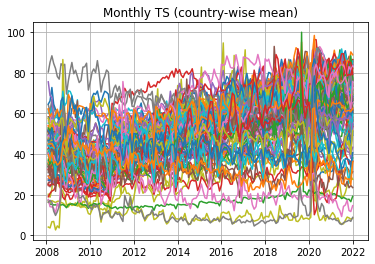

In [698]:
plt.title('Monthly TS (country-wise mean)')
ts_mean = create_mean_ts(df_month)
for i in range(102):  # number of features
    plt.plot(ts_mean.iloc[:, i])
plt.grid();

In [699]:
gt_cols = df_month.columns.drop(['date', 'COUNTRY'])
gt_cols

Index(['Advertising & Marketing', 'Agricultural Equipment',
       'Agriculture & Forestry', 'Alcoholic Beverages', 'Apparel',
       'Aquaculture', 'Architecture', 'Auto Financing', 'Autos & Vehicles',
       'Aviation',
       ...
       'Topic_Loan', 'Topic_Luggage', 'Topic_Mortgage', 'Topic_Office space',
       'Topic_Public debt', 'Topic_Recession', 'Topic_Recruitment',
       'Topic_Student loan', 'Topic_Unemployment',
       'Topic_Unemployment benefits'],
      dtype='object', length=102)

In [700]:
log_gt = np.log(1 + df_month[gt_cols])

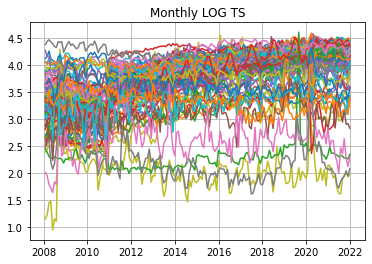

In [701]:
plt.title('Monthly LOG TS')
ts_mean = create_mean_ts(log_gt)
for i in range(102):
    plt.plot(ts_mean.iloc[:, i])
plt.grid();

**Long-term Trend Extraction**

In [702]:
log_gt.shape[0] / 46

168.0

In [703]:
new_log_gt = log_gt.copy()

In [704]:
from sklearn.decomposition import PCA

for i in range(46):  # number of countries
    pca = PCA(n_components=1)
    log_gt_i = log_gt.iloc[168*i:168*(i+1)].copy()
    trend = pca.fit_transform(log_gt_i - log_gt_i.mean())
    
    trend_standard = (trend - trend.mean()) / trend.std()
    trend_scaled = (trend_standard * log_gt_i.std().mean()) - log_gt_i.mean().mean()
    
    new_log_gt.iloc[168*i:168*(i+1)] = log_gt_i - trend_scaled

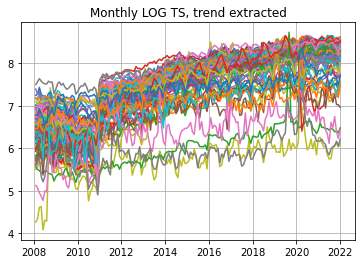

In [705]:
plt.title('Monthly LOG TS, trend extracted')
ts_mean = create_mean_ts(new_log_gt)
for i in range(102):
    plt.plot(ts_mean.iloc[:, i])
plt.grid();

In [706]:
def trend_extraction(log_df):
    pca = PCA(n_components=1)
    trend = pca.fit_transform(log_df)
    
    trend_standard = (trend - trend.mean()) / trend.std()
    trend_scaled = (trend_standard * log_df.std().mean()) - log_df.mean().mean()
    
    return log_df - trend_scaled

**Adressing breaks**\
Устранение разрывов в 2011 и 2016 годах.

In [707]:
idx_2011 = np.where(date_index == '2011-01-01')[0][0]
idx_2010 = np.where(date_index == '2010-01-01')[0][0]

idx_2016 = np.where(date_index == '2016-01-01')[0][0]
idx_2015 = np.where(date_index == '2015-01-01')[0][0]

In [708]:
for i in range(46):  # number of countries
    break1 = new_log_gt.iloc[168*i + idx_2011] - new_log_gt.iloc[168*i + idx_2010]
    break2 = new_log_gt.iloc[168*i + idx_2016] - new_log_gt.iloc[168*i + idx_2016]
    
    new_log_gt[168*i + idx_2011: 168*(i+1)] -= break1
    new_log_gt[168*i + idx_2016: 168*(i+1)] -= break2

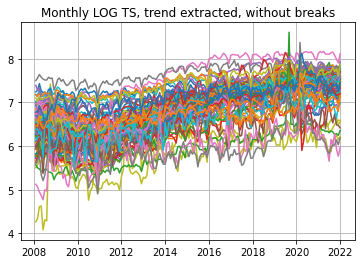

In [709]:
plt.title('Monthly LOG TS, trend extracted, without breaks')
ts_mean = create_mean_ts(new_log_gt)
for i in range(102):
    plt.plot(ts_mean.iloc[:, i])
plt.grid();

In [710]:
def breaks_elimination(df):
    idx_2011 = np.where(date_index == '2011-01-01')[0][0]
    idx_2010 = np.where(date_index == '2010-01-01')[0][0]

    idx_2016 = np.where(date_index == '2016-01-01')[0][0]
    idx_2015 = np.where(date_index == '2015-01-01')[0][0]
    
    break1 = df.iloc[idx_2011] - df.iloc[idx_2010]
    break2 = df.iloc[idx_2016] - df.iloc[idx_2016]

    df[idx_2011:] -= break1
    df[idx_2016:] -= break2
    return df

**Seasonality extraction**

In [711]:
categs_month = new_log_gt.iloc[:, :84].copy()
topics_month = new_log_gt.iloc[:, 84:].copy()

In [712]:
categs_month.shape[0]

7728

In [713]:
# Seasonality extraction for categories
for i in range(46):
    categs_month.iloc[168*i: 168*(i+1)] -= categs_month.iloc[168*i: 168*(i+1)].shift(12)

mask_to_drop = np.tile(np.array([False] * 12 + [True] * 156), 46)
categs_month = categs_month[mask_to_drop]
categs_month = categs_month.reset_index(drop=True)

In [714]:
topics_month = topics_month[mask_to_drop]
topics_month = topics_month.reset_index(drop=True)

In [715]:
print(f'Всего {topics_month.shape[0] / 46} месяцев')

Всего 156.0 месяцев


**Quarterly mean**

In [716]:
def quarterly_mean(gt_month):
    m1 = gt_month[::3].values
    m2 = gt_month[1::3].values
    m3 = gt_month[2::3].values
    
    gt_quart = pd.DataFrame((m1 + m2 + m3) / 3, columns=gt_month.columns)
    return gt_quart

gt_quart = quarterly_mean(pd.concat([categs_month, 
                                     topics_month], axis=1))
gt_quart.shape

(2392, 102)

In [717]:
print(f'Всего {gt_quart.shape[0] / 46} квартала')

Всего 52.0 квартала


In [718]:
countries_tick3

array(['ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHE', 'CHL',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA',
       'GBR', 'GRC', 'HUN', 'IDN', 'IND', 'IRL', 'ISL', 'ISR', 'ITA',
       'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL',
       'POL', 'PRT', 'ROU', 'RUS', 'SVK', 'SVN', 'SWE', 'TUR', 'USA',
       'ZAF'], dtype=object)

In [719]:
date_quart = gdp[gdp['LOCATION'] == 'AUS']['TIME'][4:]
pd.Series(np.tile(np.array(date_quart), 46), name='date').shape

(2392,)

In [720]:
# Устанавливаем тикеры стран
country_tick = pd.Series(np.repeat(countries_tick3, 52), name='COUNTRY')

# Устанавливаем номера кварталов из ВВП
date_quart = gdp[gdp['LOCATION'] == 'AUS']['TIME'][4:]
date_quart_col = pd.Series(np.tile(np.array(date_quart), 46), name='date')

quart_gt_processed = pd.concat([date_quart_col, 
                                gt_quart, 
                                country_tick], axis=1)
quart_gt_processed.shape

(2392, 104)

In [721]:
quart_gt_processed.isna().any().any()

False

In [722]:
# Сохраняем
quart_gt_processed.to_csv('data_processed/quart_gt_processed.csv', index=False)

**Quarterly graphs**

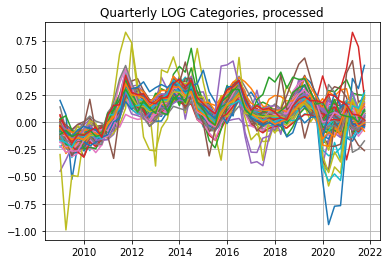

In [723]:
plt.title('Quarterly LOG Categories, processed')
ts_mean = create_mean_ts(gt_quart, date_quart)
for i in range(84):
    plt.plot(ts_mean.iloc[:, i])
plt.grid();

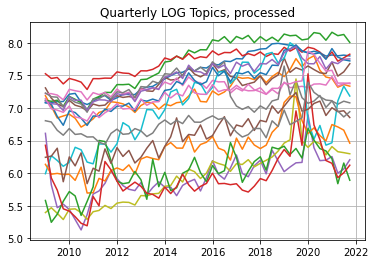

In [725]:
plt.title('Quarterly LOG Topics, processed')
ts_mean = create_mean_ts(gt_quart, date_quart)
for i in range(84, 102):
    plt.plot(ts_mean.iloc[:, i])
plt.grid();

# Google Trends Weekly Timeseries
### Data reading 2020-2021

In [817]:
# Создаем датасеты для первой страны
categs_0 = pd.read_csv(f'wdata_2021/gt_weekly_categories/WeeklyGoogleTrends_AR.csv')
topics_0 = pd.read_csv(f'wdata_2021/gt_weekly_topics/WeeklyTopics_AR.csv')

date_idx = topics_0['date']

categs_0, topics_0 = categs_0[uniq_categs], topics_0[uniq_topics]
topics_0.columns = np.array(f'Topic_') + np.array(topics_0.columns)

df_weekly21 = pd.concat([date_idx, categs_0, topics_0], axis=1)
df_weekly21['COUNTRY'] = inv_ticks_dict['AR']

# Запускаем цикл на всех странах
for ticker in countries_tick2[1:]:
    categs_i = pd.read_csv(f'wdata_2021/gt_weekly_categories/WeeklyGoogleTrends_{ticker}.csv')
    topics_i = pd.read_csv(f'wdata_2021/gt_weekly_topics/WeeklyTopics_{ticker}.csv')
    date_idx = topics_i['date']
    
    categs_i = categs_i[uniq_categs]
    topics_i = topics_i[uniq_topics]
    topics_i.columns = np.array(f'Topic_') + np.array(topics_i.columns)
    
    df_i = pd.concat([date_idx, categs_i, topics_i], axis=1)
    df_i['COUNTRY'] = f'{inv_ticks_dict[ticker]}'
    
    df_weekly21 = pd.concat([df_weekly21, df_i], axis=0, ignore_index=True)

In [818]:
# 2020
categs_0 = pd.read_csv(f'wdata_2020/gt_weekly_categories/WeeklyGoogleTrends_AR.csv')
topics_0 = pd.read_csv(f'wdata_2020/gt_weekly_topics/WeeklyTopics_AR.csv')

date_idx = topics_0['date']

categs_0, topics_0 = categs_0[uniq_categs], topics_0[uniq_topics]
topics_0.columns = np.array(f'Topic_') + np.array(topics_0.columns)

df_weekly20 = pd.concat([date_idx, categs_0, topics_0], axis=1)
df_weekly20['COUNTRY'] = inv_ticks_dict['AR']

for ticker in countries_tick2[1:]:
    categs_i = pd.read_csv(f'wdata_2020/gt_weekly_categories/WeeklyGoogleTrends_{ticker}.csv')
    topics_i = pd.read_csv(f'wdata_2020/gt_weekly_topics/WeeklyTopics_{ticker}.csv')
    date_idx = topics_i['date']
    
    categs_i = categs_i[uniq_categs]
    topics_i = topics_i[uniq_topics]
    topics_i.columns = np.array(f'Topic_') + np.array(topics_i.columns)
    
    df_i = pd.concat([date_idx, categs_i, topics_i], axis=1)
    df_i['COUNTRY'] = f'{inv_ticks_dict[ticker]}'
    
    df_weekly20 = pd.concat([df_weekly20, df_i], axis=0, ignore_index=True)

In [819]:
date_index21 = df_weekly21['date']
date_index20 = df_weekly20['date']

In [820]:
df_weekly = pd.concat([df_weekly20, df_weekly21], axis=0)
df_weekly = df_weekly.sort_values(['COUNTRY', 'date'])

In [732]:
df_weekly.isna().any().any()

False

In [733]:
print(f'Всего {df_weekly.shape[0] / 46} недели для 46 стран.')

Всего 104.0 недели для 46 стран.


In [731]:
# Сохраняем
# df_weekly.to_csv('data_raw/weekly_gt_raw.csv', index=False)

### Data processing
**Weekly series calibration on the monthly series** \
Так как недельные данные в Google trends домножаются на 

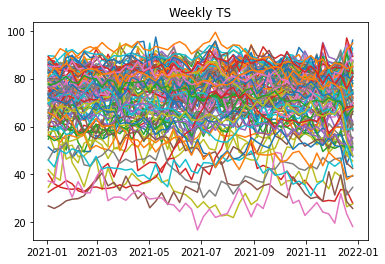

In [878]:
plt.title('Weekly TS')
ts_mean = create_mean_ts(df_weekly21, date_index21[:52])
for i in range(102):
    plt.plot(ts_mean.iloc[:, i])

Используем уже добытые данные

In [794]:
data_quart = pd.read_csv('data_processed/quart_gt_processed.csv')
data_week = pd.read_csv('data_raw/weekly_gt_raw.csv')
data_month = pd.read_csv('data_raw/monthly_gt_raw.csv')

Отбираем нужные строки и столбцы

In [795]:
data_month['date2'] = data_month['date'].apply(lambda x: x[:4])

In [796]:
svi_month = data_month[(data_month['date2'] == '2020') | (data_month['date'] == '2021-01-01')]
svi_month = svi_month.reset_index(drop=True).iloc[:, 1:105]

In [797]:
svi_month_rest = svi_month[svi_month['COUNTRY'] != 'RUS'].iloc[:, :102]
svi_month_rus = svi_month[svi_month['COUNTRY'] == 'RUS'].iloc[:, :102]

Условия для того, чтобы убрать каждую 12 строку (эти строки фиктивные)

In [798]:
cond_mw = ([True] * 12 + [False]) * 45
cond_mw_rus = ([True] * 12 + [False])

Считаем разности между месяцами

In [799]:
svi_mw_rest = (np.vstack([np.array(svi_month_rest), np.zeros(102)])[1:] - np.array(svi_month_rest))[cond_mw]
svi_mw_rus = (np.vstack([np.array(svi_month_rus), np.zeros(102)])[1:] - np.array(svi_month_rus))[cond_mw_rus]

Фиксируем 'нулевые' значения для каждой страны и признака

In [800]:
start_points_rest = np.array(svi_month_rest)[cond_mw][::12]
start_points_rus = np.array(svi_month_rus)[([True] * 12 + [False])][0]

Расчет "недельных" значений

In [801]:
w=0
m2w = []
m2w_rus = []
denom = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

for day in range(366):
    if day <= 30:
        month = 0 
    elif  31<= day <= 59:
        month = 1
    elif 60<= day <= 90:
        month = 2
    elif 91<= day <= 120:
        month = 3
    elif 121<= day <= 151:
        month = 4
    elif 152<= day <= 181:
        month = 5
    elif 182<= day <= 212:
        month = 6
    elif 213<= day <= 243:
        month = 7
    elif 244<= day <= 273:
        month = 8
    elif 274<= day <= 304:
        month = 9
    elif 305<= day <= 334:
        month = 10
    else:
        month = 11
         
    start_points_rest += svi_mw_rest[month::12] / denom[month]
    start_points_rus += svi_mw_rus[month] / denom[month]
    
    if day == 365:
        m2w.append(start_points_rest.copy())
        m2w_rus.append(start_points_rus.copy())
        
    elif (day + 1) % 7 == 0 and day != 363:
        m2w.append(start_points_rest.copy())
        m2w_rus.append(start_points_rus.copy())
        w += 1

Объединяем результаты и собираем в датафрэйм

In [802]:
m2w = np.hstack(m2w)
m2w_rus = np.vstack(m2w_rus)

In [803]:
for i in range(45):
    for j in range(52):
        m2w_rus = np.vstack([m2w_rus, m2w[i, j * 102: (j+1) * 102]])
df_m2w = pd.DataFrame(m2w_rus)

non_rus = svi_month[svi_month['COUNTRY'] != 'RUS']['COUNTRY'].unique()
df_m2w['COUNTRY'] = np.hstack(['RUS'] * 52 + [[i] * 52 for i in non_rus])

In [804]:
month2week20 = df_m2w.copy()
month2week20.insert(0, 'date', date_index20)
month2week20.columns = df_weekly.columns

month2week20 = month2week20.sort_values(['COUNTRY', 'date'])
month2week20 = month2week20.reset_index(drop=True)
month2week20.head()

,date,Advertising & Marketing,Agricultural Equipment,Agriculture & Forestry,Alcoholic Beverages,Apparel,Aquaculture,Architecture,Auto Financing,Autos & Vehicles,...,Topic_Luggage,Topic_Mortgage,Topic_Office space,Topic_Public debt,Topic_Recession,Topic_Recruitment,Topic_Student loan,Topic_Unemployment,Topic_Unemployment benefits,COUNTRY
0,2020-01-05,45.774194,77.774194,71.000000,76.677419,92.548387,51.096774,47.774194,84.774194,58.774194,...,54.322581,31.096774,45.225806,23.193548,8.451613,51.000000,38.096774,59.645161,34.419355,ARG
1,2020-01-12,45.548387,77.548387,71.000000,77.354839,92.096774,50.193548,47.548387,84.548387,58.548387,...,53.645161,30.193548,38.451613,21.387097,8.903226,51.000000,37.193548,58.290323,32.838710,ARG
2,2020-01-19,45.322581,77.322581,71.000000,78.032258,91.645161,49.290323,47.322581,84.322581,58.322581,...,52.967742,29.290323,31.677419,19.580645,9.354839,51.000000,36.290323,56.935484,31.258065,ARG
3,2020-01-26,45.096774,77.096774,71.000000,78.709677,91.193548,48.387097,47.096774,84.096774,58.096774,...,52.290323,28.387097,24.903226,17.774194,9.806452,51.000000,35.387097,55.580645,29.677419,ARG
4,2020-02-02,45.000000,77.137931,71.689655,79.413793,88.655172,49.655172,46.034483,81.793103,57.586207,...,48.137931,27.862069,22.275862,18.793103,22.413793,49.482759,36.517241,58.448276,33.689655,ARG


In [806]:
# Повторяем для 2021
svi_month = data_month[(data_month['date2'] == '2021') | (data_month['date2'] == '2022')]
svi_month = svi_month.reset_index(drop=True).iloc[:, 1:105]

svi_month_rest = svi_month[svi_month['COUNTRY'] != 'RUS'].iloc[:, :102]
svi_month_rus = svi_month[svi_month['COUNTRY'] == 'RUS'].iloc[:, :102]

cond_mw = ([True] * 12 + [False]) * 45
cond_mw_rus = ([True] * 12 + [False])

svi_mw_rest = (np.vstack([np.array(svi_month_rest), np.zeros(102)])[1:] - np.array(svi_month_rest))[cond_mw]
svi_mw_rus = (np.vstack([np.array(svi_month_rus), np.zeros(102)])[1:] - np.array(svi_month_rus))[cond_mw_rus]

start_points_rest = np.array(svi_month_rest)[cond_mw][::12]
start_points_rus = np.array(svi_month_rus)[([True] * 12 + [False])][0]

In [807]:
w=0
m2w = []
m2w_rus = []
denom = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

for day in range(365):
    if day <= 30:
        month = 0
    elif  31<= day <= 58:
        month = 1
    elif 59<= day <= 89:
        month = 2
    elif 90<= day <= 119:
        month = 3
    elif 120<= day <= 150:
        month = 4
    elif 151<= day <= 180:
        month = 5
    elif 181<= day <= 211:
        month = 6
    elif 212<= day <= 242:
        month = 7
    elif 243<= day <= 272:
        month = 8
    elif 273<= day <= 303:
        month = 9
    elif 304<= day <= 333:
        month = 10
    else:
        month = 11
        
    start_points_rest += svi_mw_rest[month::12] / denom[month]
    start_points_rus += svi_mw_rus[month] / denom[month]
    
    if day == 364:
        m2w.append(start_points_rest.copy())
        m2w_rus.append(start_points_rus.copy())
        
    elif (day + 1) % 7 == 0 and day != 363:
        m2w.append(start_points_rest.copy())
        m2w_rus.append(start_points_rus.copy())
        w += 1

In [808]:
m2w = np.hstack(m2w)
m2w_rus = np.vstack(m2w_rus)

for i in range(45):
    for j in range(52):
        m2w_rus = np.vstack([m2w_rus, m2w[i, j * 102: (j+1) * 102]])
df_m2w = pd.DataFrame(m2w_rus)

non_rus = svi_month[svi_month['COUNTRY'] != 'RUS']['COUNTRY'].unique()
df_m2w['COUNTRY'] = np.hstack(['RUS'] * 52 + [[i] * 52 for i in non_rus])

In [810]:
month2week21 = df_m2w.copy()
month2week21.insert(0, 'date', date_index21)
month2week21.columns = df_weekly.columns

month2week21 = month2week21.sort_values(['COUNTRY', 'date'])
month2week21 = month2week21.reset_index(drop=True)
month2week21.head()

,date,Advertising & Marketing,Agricultural Equipment,Agriculture & Forestry,Alcoholic Beverages,Apparel,Aquaculture,Architecture,Auto Financing,Autos & Vehicles,...,Topic_Luggage,Topic_Mortgage,Topic_Office space,Topic_Public debt,Topic_Recession,Topic_Recruitment,Topic_Student loan,Topic_Unemployment,Topic_Unemployment benefits,COUNTRY
0,2021-01-03,43.225806,85.000000,82.580645,71.548387,92.225806,68.290323,46.225806,82.032258,57.129032,...,12.225806,26.774194,45.645161,21.548387,7.774194,47.451613,38.225806,59.774194,42.096774,ARG
1,2021-01-10,43.451613,85.000000,84.161290,71.096774,92.451613,65.580645,46.451613,84.064516,58.258065,...,12.451613,26.548387,44.290323,21.096774,7.548387,47.903226,38.451613,59.548387,41.193548,ARG
2,2021-01-17,43.677419,85.000000,85.741935,70.645161,92.677419,62.870968,46.677419,86.096774,59.387097,...,12.677419,26.322581,42.935484,20.645161,7.322581,48.354839,38.677419,59.322581,40.290323,ARG
3,2021-01-24,43.903226,85.000000,87.322581,70.193548,92.903226,60.161290,46.903226,88.129032,60.516129,...,12.903226,26.096774,41.580645,20.193548,7.096774,48.806452,38.903226,59.096774,39.387097,ARG
4,2021-01-31,44.142857,85.571429,88.428571,70.285714,92.857143,60.428571,46.857143,89.571429,62.000000,...,13.142857,25.714286,42.714286,19.571429,7.000000,49.000000,40.000000,58.571429,38.714286,ARG


Ищем нормировочную константу, поделив интерполированные месячные на изначальные недельные данные и, усреднив по признакам и странам.

In [825]:
# 2021
cal_const21 = np.zeros([46*52, 102])
for i in range(46): 
    month2week_i = month2week21.iloc[52*i: 52*(i+1)]
    df_weekly_i = df_weekly21.iloc[52*i: 52*(i+1)]
    cal_const21[52*i: 52*(i+1), :] = np.mean(month2week_i[gt_cols] / df_weekly_i[gt_cols], axis=0)
cal_const21.shape

(2392, 102)

In [826]:
df_weekly21_cal = df_weekly21.copy()
df_weekly21_cal[gt_cols] = df_weekly21_cal[gt_cols] * cal_const21
df_weekly21_cal.head()

,date,Advertising & Marketing,Agricultural Equipment,Agriculture & Forestry,Alcoholic Beverages,Apparel,Aquaculture,Architecture,Auto Financing,Autos & Vehicles,...,Topic_Luggage,Topic_Mortgage,Topic_Office space,Topic_Public debt,Topic_Recession,Topic_Recruitment,Topic_Student loan,Topic_Unemployment,Topic_Unemployment benefits,COUNTRY
0,2021-01-03,41.031576,63.744323,69.635241,66.507962,84.025425,51.844437,55.769429,83.089745,55.187780,...,35.662488,21.027772,inf,10.551090,3.349657,28.927974,inf,84.160994,28.851627,ARG
1,2021-01-10,40.548851,64.710146,71.517275,68.801340,81.658512,51.844437,55.769429,84.002819,55.860802,...,38.684733,20.426979,inf,10.551090,3.349657,39.312375,inf,84.160994,27.019778,ARG
2,2021-01-17,40.066127,63.744323,71.517275,68.801340,80.475055,52.554635,45.730932,82.176671,57.206845,...,48.355916,22.229359,inf,18.590015,4.567714,27.444488,inf,59.798601,27.019778,ARG
3,2021-01-24,41.031576,68.573438,70.576258,68.801340,81.658512,51.134239,46.846321,84.002819,56.533823,...,44.729222,24.632533,NaN,7.034060,4.415457,34.120174,inf,33.221445,32.973288,ARG
4,2021-01-31,42.479749,70.505084,73.399308,68.801340,80.475055,51.844437,45.173238,83.089745,55.187780,...,38.684733,27.035707,NaN,7.034060,4.263200,40.795861,inf,64.228127,27.019778,ARG


In [831]:
# 2020
cal_const20 = np.zeros([46*52, 102])
for i in range(46): 
    month2week_i = month2week20.iloc[52*i: 52*(i+1)]
    df_weekly_i = df_weekly20.iloc[52*i: 52*(i+1)]
    cal_const20[52*i: 52*(i+1), :] = np.mean(month2week_i[gt_cols] / df_weekly_i[gt_cols], axis=0)
cal_const20.shape

(2392, 102)

In [832]:
df_weekly20_cal = df_weekly20.copy()
df_weekly20_cal[gt_cols] = df_weekly20_cal[gt_cols] * cal_const20
df_weekly20_cal.head()

,date,Advertising & Marketing,Agricultural Equipment,Agriculture & Forestry,Alcoholic Beverages,Apparel,Aquaculture,Architecture,Auto Financing,Autos & Vehicles,...,Topic_Luggage,Topic_Mortgage,Topic_Office space,Topic_Public debt,Topic_Recession,Topic_Recruitment,Topic_Student loan,Topic_Unemployment,Topic_Unemployment benefits,COUNTRY
0,2020-01-05,41.108406,59.251579,56.609018,75.353506,79.430539,63.966970,33.478166,90.284246,65.441475,...,116.732004,33.753877,inf,inf,11.407235,57.682416,inf,70.124486,33.845728,ARG
1,2020-01-12,43.330482,67.852614,57.677113,83.285454,80.652548,71.643007,35.710043,70.465753,64.034132,...,114.397364,61.370685,inf,inf,12.928200,63.649563,inf,42.853853,30.622325,ARG
2,2020-01-19,38.330811,68.808285,53.404734,75.353506,73.320498,64.819863,34.966084,66.061644,59.812101,...,105.058803,35.594998,inf,inf,16.730612,51.715270,inf,97.395120,29.010624,ARG
3,2020-01-26,37.219773,70.719626,56.609018,74.031514,79.430539,69.084328,37.197962,72.667808,60.515773,...,91.050963,35.594998,inf,inf,8.365306,39.117961,inf,35.062243,30.622325,ARG
4,2020-02-02,42.774963,67.852614,58.745207,74.031514,81.874556,69.937221,36.454003,95.789383,67.552490,...,86.381683,33.753877,inf,NaN,6.844341,42.433042,inf,112.978339,30.622325,ARG


In [844]:
df_weekly20_cal = df_weekly20_cal.replace(np.inf, 0).fillna(0)
df_weekly21_cal = df_weekly21_cal.replace(np.inf, 0).fillna(0)

**Weekly graphs**

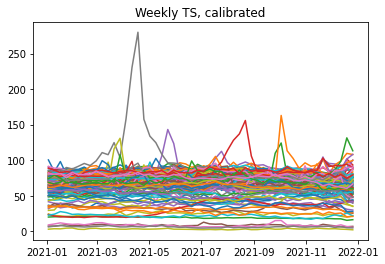

In [851]:
plt.title('Weekly TS, calibrated')
ts_mean = create_mean_ts(df_weekly21_cal, date_index21[:52])
for i in range(102):
    plt.plot(ts_mean.iloc[:, i])

In [852]:
weekly_log_gt21 = np.log(1 + df_weekly21_cal[gt_cols])
weekly_log_gt20 = np.log(1 + df_weekly20_cal[gt_cols])

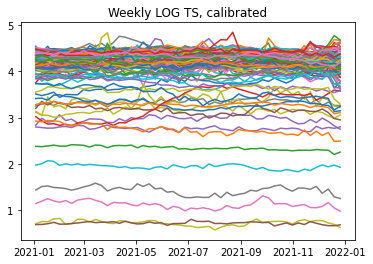

In [853]:
plt.title('Weekly LOG TS, calibrated')
ts_mean = create_mean_ts(weekly_log_gt21, date_index21[:52])
for i in range(102):
    plt.plot(ts_mean.iloc[:, i])

**Long-term Trend Extraction** \
Убирать тренд для недельных данных не требуется, так как за один год тренд не наблюдается

**Log difference between 2020 and 2021** 

In [855]:
categs_week21 = weekly_log_gt21.iloc[:, :84].copy()
categs_week20 = weekly_log_gt20.iloc[:, :84].copy()

topics_week21 = weekly_log_gt21.iloc[:, 84:].copy()
topics_week20 = weekly_log_gt20.iloc[:, 84:].copy()  # Это не потребовалось, тк логдифф для категорий

In [856]:
categs_week = categs_week21 - categs_week20

In [858]:
print(f'Всего {topics_week21.shape[0] / 46} месяца')

Всего 52.0 месяца


In [865]:
country_tick = pd.Series(np.repeat(countries_tick3, 52), name='COUNTRY')
weekly_gt_processed = pd.concat([categs_week,
                                 topics_week21,
                                 country_tick], axis=1)
weekly_gt_processed.head()

,Advertising & Marketing,Agricultural Equipment,Agriculture & Forestry,Alcoholic Beverages,Apparel,Aquaculture,Architecture,Auto Financing,Autos & Vehicles,Aviation,...,Topic_Luggage,Topic_Mortgage,Topic_Office space,Topic_Public debt,Topic_Recession,Topic_Recruitment,Topic_Student loan,Topic_Unemployment,Topic_Unemployment benefits,COUNTRY
0,-0.001826,0.071917,0.203850,-0.123128,0.055556,-0.206527,0.498672,-0.082094,-0.167622,-0.707567,...,3.601754,3.092304,0.0,2.44678,1.470097,3.398794,0.0,4.444544,3.396239,ARG
1,-0.064803,-0.046715,0.211775,-0.188556,0.012245,-0.318205,0.435948,0.173466,-0.134306,-0.593003,...,3.680967,3.064651,0.0,2.44678,1.470097,3.696658,0.0,4.444544,3.332911,ARG
2,0.043175,-0.075307,0.287374,-0.089721,0.091910,-0.206219,0.261830,0.215355,-0.043786,-0.534827,...,3.899058,3.145417,0.0,2.97502,1.716985,3.347954,0.0,4.107567,3.332911,ARG
3,0.095068,-0.030382,0.217084,-0.072255,0.027324,-0.295877,0.225212,0.143119,-0.066921,-0.569955,...,3.822738,3.243862,0.0,2.08369,1.689257,3.558776,0.0,3.532852,3.525575,ARG
4,-0.006767,0.037800,0.219358,-0.072255,-0.017031,-0.294443,0.209287,-0.140653,-0.198900,-0.637706,...,3.680967,3.333479,0.0,2.08369,1.660739,3.732797,0.0,4.177891,3.332911,ARG


In [866]:
# Сохраняем
weekly_gt_processed.to_csv('data_processed/weekly_gt_processed.csv', index=False)

**Weekly log-diff graphs**

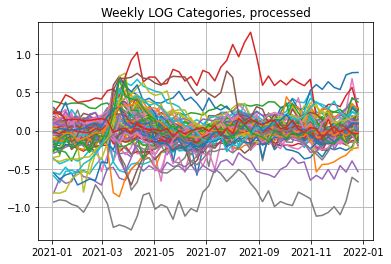

In [874]:
plt.title('Weekly LOG Categories, processed')
ts_mean = create_mean_ts(weekly_gt_processed, date_index21[:52])
for i in range(84):
    plt.plot(ts_mean.iloc[:, i])
plt.grid();

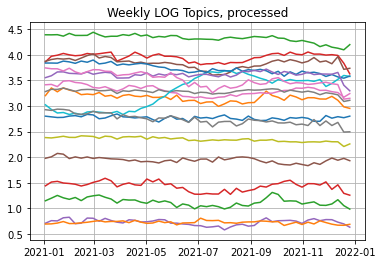

In [876]:
plt.title('Weekly LOG Topics, processed')
ts_mean = create_mean_ts(weekly_gt_processed, date_index21[:52])
for i in range(84, 102):
    plt.plot(ts_mean.iloc[:, i])
plt.grid();